In [66]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

In [67]:
df = pd.read_csv('homeprices.csv')
df

area   price
0  2600  550000
1  3000  565000
2  3200  610000
3  3600  680000
4  4000  725000

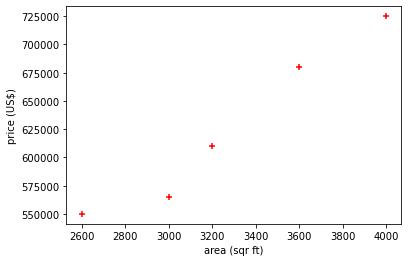

In [68]:
%matplotlib inline
df.columns
plt.ylabel('price (US$)')
plt.xlabel('area (sqr ft)')
plt.scatter(df.area, df.price, color='red', marker='+')

In [69]:
model = linear_model.LinearRegression()
model.fit(df[['area']], df.price)

LinearRegression()

In [70]:
model.predict([[5000]])

array([859554.79452055])

In [71]:
import pickle

In [72]:
with open('model_pickle', 'wb') as f:
    pickle.dump(model, f)

In [73]:
with open('model_pickle', 'rb') as f:
    modelPickle = pickle.load(f)

In [74]:
modelPickle.predict(np.array([5000]).reshape(1,-1))

array([859554.79452055])

In [75]:
model.coef_

array([135.78767123])

In [83]:
import joblib

In [84]:
joblib.dump(model, 'model_joblib')

['model_joblib']

In [85]:
modelJoblib = joblib.load('model_joblib')

In [86]:
modelJoblib.predict(np.array([5000]).reshape(1,-1))

array([859554.79452055])

In [76]:
model.intercept_

180616.43835616432

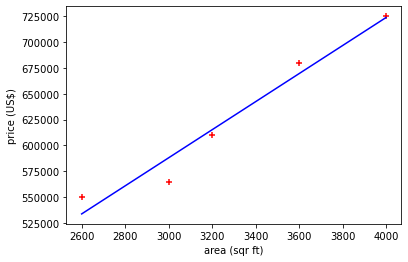

In [77]:
%matplotlib inline
df.columns
plt.ylabel('price (US$)')
plt.xlabel('area (sqr ft)')
plt.scatter(df.area, df.price, color='red', marker='+')
plt.plot(df.area, model.predict(df[['area']]), color = 'blue')

In [78]:
d = pd.read_csv('areas.csv')
d.head(4)

area
0  1000
1  1500
2  2300
3  3540

In [79]:
p = model.predict(d)

In [80]:
d['prices'] = p
d.to_csv('predictions.csv', index=False)